In [26]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [27]:
MODEL = "0110"

PATHS = [
"aorta",
"right_iliac"   
]

PATHS_LABEL = [
"aorta",
"aorta",
"leff iliac"   
]

# MODEL = "0144"

# PATHS = [
# "aorta",   
# "celiac_hepatic",
# "celiac_splenic",
# "ext_iliac_left",
# "renal_left",
# "renal_right",
# "SMA"
# ]

# PATHS_LABEL = [
# "aorta",
# "aorta",
# "celiac hepatic",
# "celiac splenic",
# "ext iliac left",
# "renal left",
# "renal right",
# "SMA"    
# ]

# MODEL = "coronary"

# PATHS = [
# "lc1",
# "lc1_sub1",
# "lc1_sub2",
# "lc1_sub3",
# "lc2",
# "lc2_sub1"
# ]

# PATHS_LABEL = [
# "lc1",
# "lc1 sub1",
# "lc1 sub2",
# "lc1 sub3",
# "lc2",
# "lc2 sub1"    
# ]


CASE  = "sim_wom_rcr"
#CASE = "sim_cor_inflow"

mesh  = "coarse"

gen   = 2

T = 1620

quants   = [
 #"area",
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

models   = list(range(50))
dt       = 0.01

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+"_edit.csv"
    
df = pd.read_csv(DIR)

OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)

In [28]:
#df_group = df.groupby(["time"])
data     = df.groupby(["point","path"])
print(data.mean())

                   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1      area  \
point path                                                              
0     aorta          310309.0          25.0            25.0  4.662219   
      right_iliac    828775.0          25.0            25.0  1.860762   
1     aorta          310360.0          76.0            76.0  4.618546   
      right_iliac    828826.0          76.0            76.0  1.737321   
2     aorta          310411.0         127.0           127.0  4.542440   
      right_iliac    828877.0         127.0           127.0  1.617270   
3     aorta          310462.0         178.0           178.0  4.475855   
4     aorta          310513.0         229.0           229.0  4.457247   
5     aorta          310564.0         280.0           280.0  4.493914   
      right_iliac    829030.0         280.0           280.0  1.400803   
6     aorta          310615.0         331.0           331.0  4.576883   
      right_iliac    829081.0         331.0        

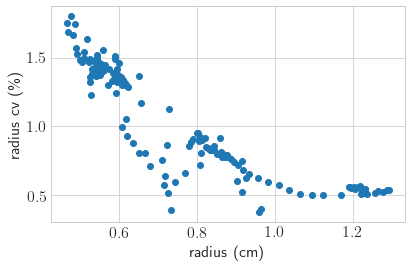

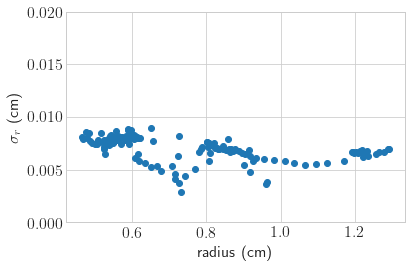

In [29]:
#data = df_group.get_group(1625).groupby(["point","path"])

r     = data.mean()['radius_actual']
r_std = data.std()['radius_actual']
r_cv  = r_std/r

mu  = data.mean()
std = data.std()

p_std = std['pressure_0']
p_cv  = p_std/mu['pressure_0']

tau_std = std['vWSS_3_boundary']
tau_cv  = tau_std/mu['vWSS_3_boundary']

v_std = std['velocity_3']
v_cv  = v_std/mu['velocity_3']

plt.figure()
plt.plot(r,r_cv*100,linestyle='',marker='o')
plt.xlabel(r'radius (cm)')
plt.ylabel(r'radius cv (\%)')
plt.tight_layout()
plt.savefig(OUTPUT+'/r_vs_rcv.png',dpi=300)
plt.savefig(OUTPUT+'/r_vs_rcv.pdf',dpi=300)
plt.show()
plt.close()

plt.figure()
plt.plot(r,r_std,linestyle='',marker='o')
plt.xlabel(r'radius (cm)')
plt.ylabel(r'$\sigma_r$ (cm)')
plt.ylim(0,0.02)
plt.tight_layout()
plt.savefig(OUTPUT+'/r_vs_rsig.png',dpi=300)
plt.savefig(OUTPUT+'/r_vs_rsig.pdf',dpi=300)
plt.show()
plt.close()

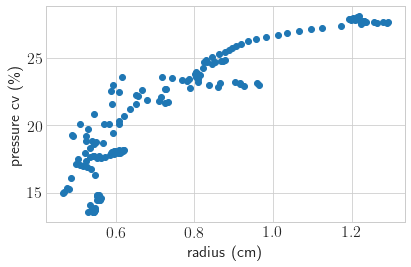

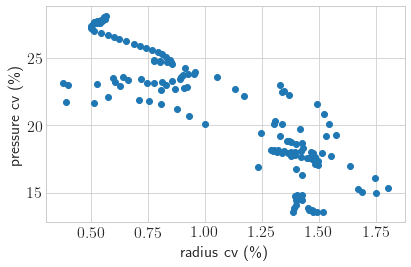

In [30]:
plt.figure()
plt.plot(r,p_cv*100,linestyle='',marker='o')
plt.ylabel(r'pressure cv (\%)')
plt.xlabel(r'radius (cm)')
plt.tight_layout()
plt.savefig(OUTPUT+'/r_vs_pcv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/r_vs_pcv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()

plt.figure()
plt.plot(r_cv*100,p_cv*100,linestyle='',marker='o')
plt.ylabel(r'pressure cv (\%)')
plt.xlabel(r'radius cv (\%)')
plt.tight_layout()
plt.savefig(OUTPUT+'/rcv_vs_pcv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/rcv_vs_pcv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()

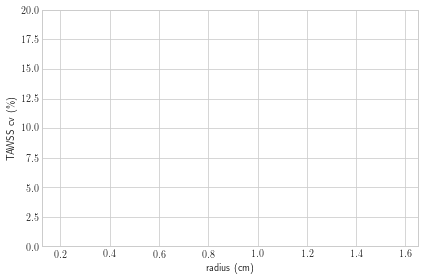

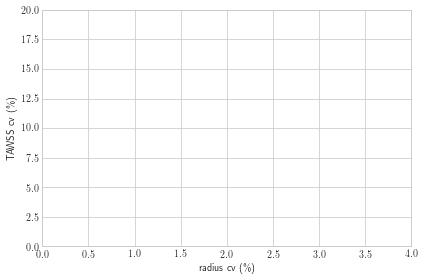

In [7]:
plt.figure()
plt.plot(r,tau_cv*100,linestyle='',marker='o')
plt.ylabel(r'TAWSS cv (\%)')
plt.xlabel(r'radius (cm)')
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(OUTPUT+'/r_vs_taucv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/r_vs_taucv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()

plt.figure()
plt.plot(r_cv*100,tau_cv*100,linestyle='',marker='o')
plt.ylabel(r'TAWSS cv (\%)')
plt.xlabel(r'radius cv (\%)')
plt.xlim(0,4)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(OUTPUT+'/rcv_vs_taucv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/rcv_vs_taucv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()

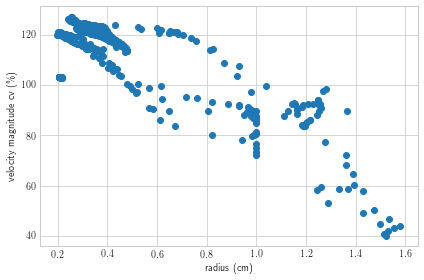

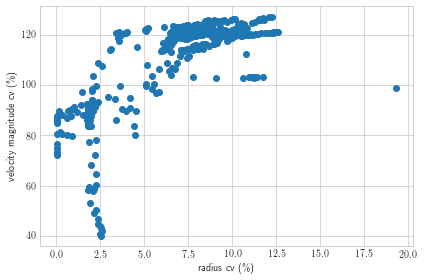

In [9]:
plt.figure()
plt.plot(r,v_cv*100,linestyle='',marker='o')
plt.ylabel(r'velocity magnitude cv (\%)')
plt.xlabel(r'radius (cm)')
plt.tight_layout()
plt.savefig(OUTPUT+'/r_vs_vcv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/r_vs_vcv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()

plt.figure()
plt.plot(r_cv*100,v_cv*100,linestyle='',marker='o')
plt.ylabel(r'velocity magnitude cv (\%)')
plt.xlabel(r'radius cv (\%)')
plt.tight_layout()
plt.savefig(OUTPUT+'/rcv_vs_vcv_{}.png'.format(T),dpi=300)
plt.savefig(OUTPUT+'/rcv_vs_vcv_{}.pdf'.format(T),dpi=300)
plt.show()
plt.close()